In [1]:
! pip install stochpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.0/279.0 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
Discarding https://files.pythonhosted.org/packages/4c/26/e9c0f6ded80916e6d1c91eb4a515ad0b3a1881391b2e76d1c30ca5ec6166/StochPy-23.tar.gz (from https://pypi.org/simple/stochpy/): Requested stochpy from https://files.pythonhosted.org/packages/4c/26/e9c0f6ded80916e6d1c91eb4a515ad0b3a1881391b2e76d1c30ca5ec6166/StochPy-23.tar.gz has inconsistent version: expected '23', but metadata has '2.3'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.3/305.3 kB 6.7 MB/s eta 0:00:00


In [2]:
! pip install Numpy==1.23.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 17.5 MB/s eta 0:00:00
  Attempting uninstall: Numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.86 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
pandas-stubs 2.0.3.230814 requires numpy>=1.25.0; python_version >= "3.9", but you have numpy 1.23.5 which is incompatible.


In [1]:
import stochpy

Info: Model Signaling3cCD.psc copied to /root/Stochpy/pscmodels
Info: Model SignalingTimeVaryingL.psc copied to /root/Stochpy/pscmodels
Info: Model Schlogl.psc copied to /root/Stochpy/pscmodels
Info: Model Burstmodel.psc copied to /root/Stochpy/pscmodels
Info: Model ImmigrationDeath.psc copied to /root/Stochpy/pscmodels
Info: Model BirthDeath.psc copied to /root/Stochpy/pscmodels
Info: Model DecayingDimerizing.psc copied to /root/Stochpy/pscmodels
Info: Model Autoreg.psc copied to /root/Stochpy/pscmodels
Info: Model Autoreg.xml copied to /root/Stochpy/pscmodels
Info: Model CellDivision.psc copied to /root/Stochpy/pscmodels
Info: Model GeneDuplication.psc copied to /root/Stochpy/pscmodels
Info: Model Isomerization.psc copied to /root/Stochpy/pscmodels
Info: Model Polymerase.psc copied to /root/Stochpy/pscmodels
Info: Model TranscriptionIntermediate.psc copied to /root/Stochpy/pscmodels
Info: Model dsmts-001-01.xml.psc copied to /root/Stochpy/pscmodels
Info: Model dsmts-001-01.xml copied

In [2]:
from google.colab import drive
import requests
drive.mount('/content/drive')
file_url = "https://raw.githubusercontent.com/iretes/rock-scissors-paper/main/RSP_model_reduced.psc"
response = requests.get(file_url)
with open("/content/drive/My Drive/RSP_model_reduced.psc", "wb") as file:
    file.write(response.content)

Mounted at /content/drive


In [3]:
smod = stochpy.SSA()
smod.Model(model_file="RSP_model_reduced.psc",dir="/content/drive/My Drive")

Adding \n to input file


In [4]:
smod.ShowSpecies()

['R', 'S', 'P']


In [42]:
smod.ChangeInitialSpeciesCopyNumber("R", 50)
smod.ChangeInitialSpeciesCopyNumber("S", 30)
smod.ChangeInitialSpeciesCopyNumber("P", 20)
smod.ChangeParameter("Pr", 0.33)
smod.ChangeParameter("Ps", 0.33)
smod.ChangeParameter("PP", 0.33)

Parameters are: ['Pr', 'Ps', 'Pp']


In [43]:
help(smod.DoStochSim)

Help on method DoStochSim in module stochpy.modules.StochSim:

DoStochSim(end=False, mode=False, method=False, trajectories=False, epsilon=0.03, IsTrackPropensities=False, rate_selection=None, species_selection=None, IsOnlyLastTimepoint=False, critical_reactions=[], reaction_orders=False, species_HORs=False, species_max_influence=False, quiet=False) method of stochpy.modules.StochSim.SSA instance
    Run a stochastic simulation for until `end` is reached. This can be either time steps or end time (which could be a *HUGE* number of steps).
    
    Input:
     - *end* [default=1000] (float) simulation end (steps or time)
     - *mode* [default='steps'] (string) simulation mode, can be one of: ['steps','time']
     - *method* [default='Direct'] (string) stochastic algorithm ['Direct', 'FRM', 'NRM', 'TauLeap']
     - *trajectories* [default = 1] (integer)
     - *epsilon* [default = 0.03] (float) parameter for the tau-leap method
     - *IsTrackPropensities* [default = False]
     - *rate

**Methods**:
- Direct: Direct Stochastic Simulation Algorithm from Gillespie (1977) [1].
- DelayedDirect.
- Delayed.
- FRM: First Reaction Method from Gillespie (1977) [1].
- NRM: Modified Next Reaction Method from Anderson 2007 [2, 3].
- DelayedNRM.
- SMM: SingleMoleculeMethod.
- fSMM: FastSingleMoleculeMethod.
- TauLeap: Tau-leaping Method [4].

**References**:
- [1] Gillespie D.T "Exact stochastic simulation of coupled chemical reactions", J. Phys. Chem, 1977.
- [2] David F. Anderson "A modified next reaction mehtod for simulating chemical systems with time dependent propensities and delays", J. Phys. Chem, 2007.
- [3] Gibson and Bruck, "Efficient Exact Stochastic Simulation of Chemical Systems with Many Species and Many Channels", J. Phys. Chem, 1999.
- [4] Cao. Y, Gillespie D., Petzold L. "Efficient step size selection for the tau-leaping method", J. Phys. Chem, 2006.

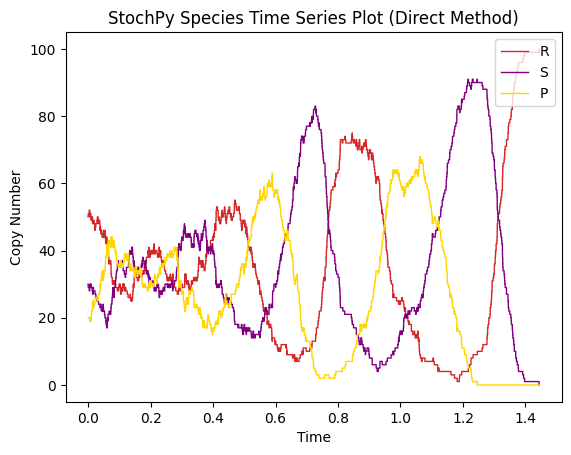

In [44]:
smod.DoStochSim(end=6000, quiet=False)
smod.PlotSpeciesTimeSeries(colors=["tab:red", "purple", "gold"])
stochpy.plt.title('StochPy Species Time Series Plot (Direct Method)');

In [45]:
spec_sums = smod.data_stochsim.species.sum(axis=1)
(spec_sums[0] == spec_sums).all()

True

<Figure size 1500x500 with 0 Axes>

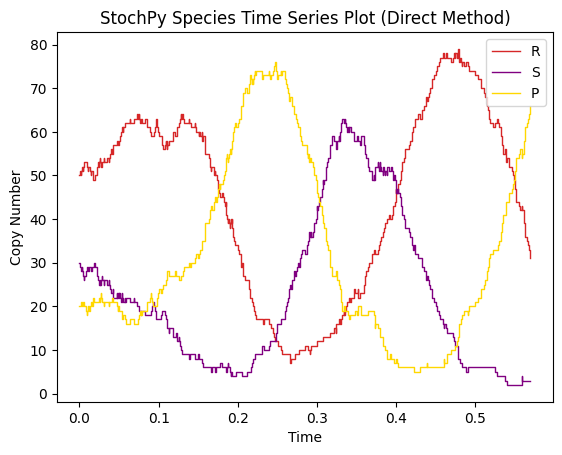

In [46]:
smod.DoStochSim(end=500, IsTrackPropensities=True, quiet=False)
stochpy.plt.figure(figsize=(15,5))
smod.PlotSpeciesTimeSeries(colors=["tab:red", "purple", "gold"])
stochpy.plt.title('StochPy Species Time Series Plot (Direct Method)');

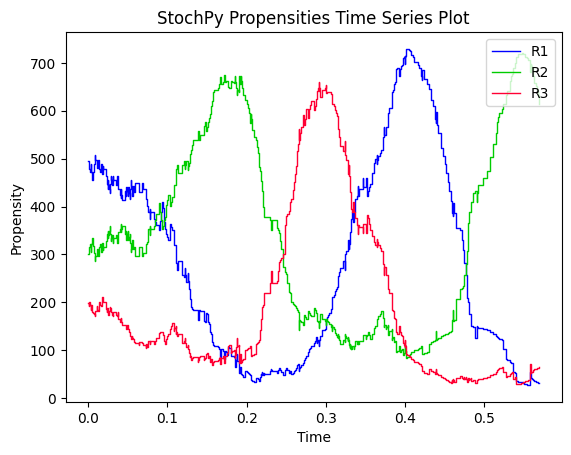

In [47]:
smod.PlotPropensitiesTimeSeries(title='StochPy Propensities Time Series Plot')

*** WARNING ***: No regular grid is created yet. Use GetRegularGrid(n_samples) if averaged results are unsatisfactory (e.g. more or less 'samples')


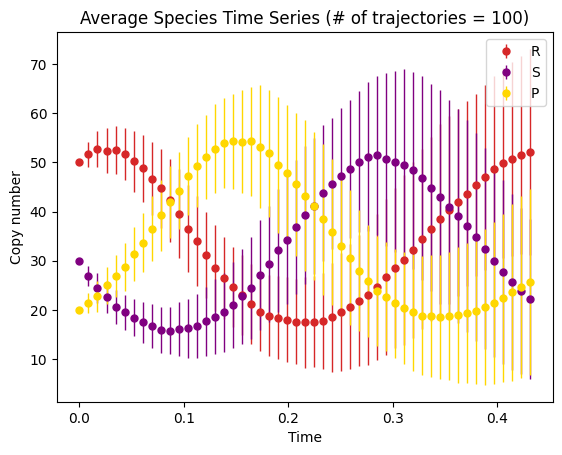

In [48]:
smod.DoStochSim(end=500, trajectories=100, quiet=False) # 1 000 000
smod.PlotAverageSpeciesTimeSeries(colors=["tab:red", "purple", "gold"])

Text(0.5, 1.0, 'Average species P Distribution')

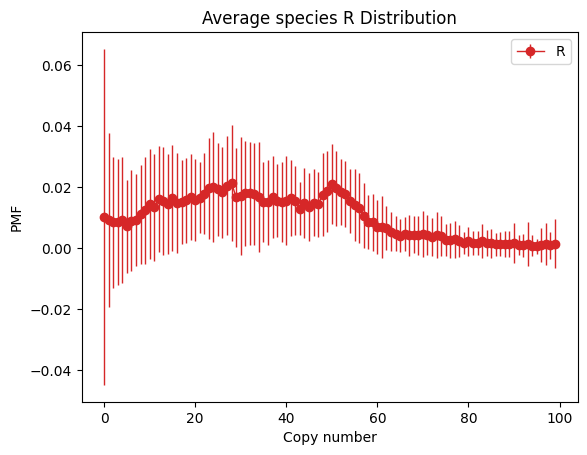

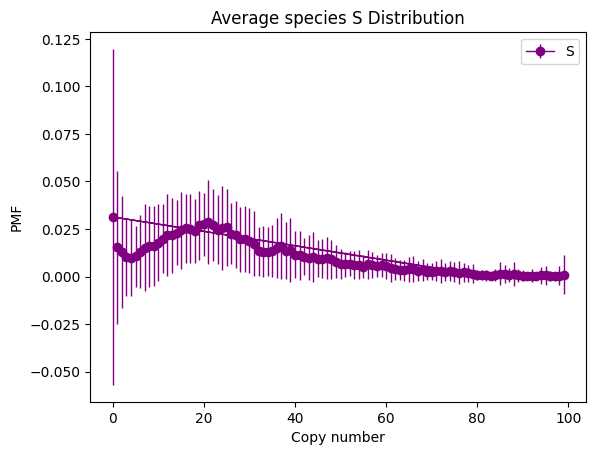

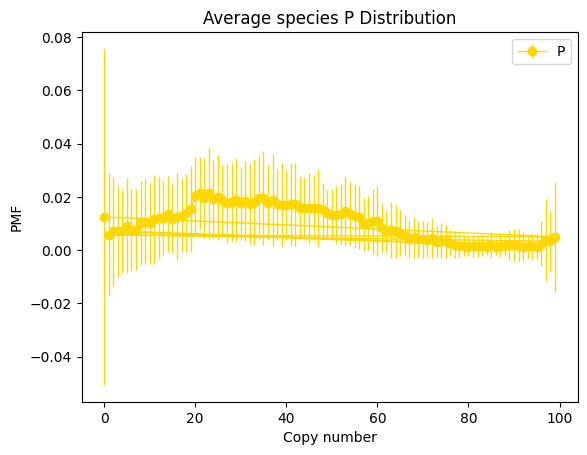

In [49]:
smod.PlotAverageSpeciesDistributions(species2plot="R", linestyle= 'solid', colors="tab:red")
stochpy.plt.title('Average species R Distribution')
smod.PlotAverageSpeciesDistributions(species2plot="S", linestyle= 'solid', colors="purple")
stochpy.plt.title('Average species S Distribution')
smod.PlotAverageSpeciesDistributions(species2plot="P", linestyle= 'solid', colors="gold")
stochpy.plt.title('Average species P Distribution')

Species	Mean
R	37.476
S	24.568
P	37.956
Species	Standard Deviation
R	16.382
S	15.497
P	15.708


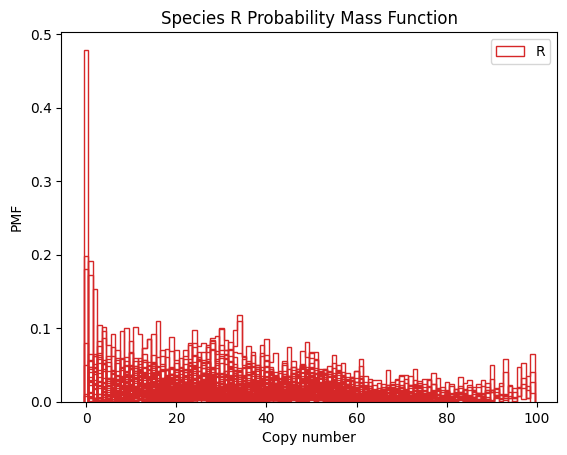

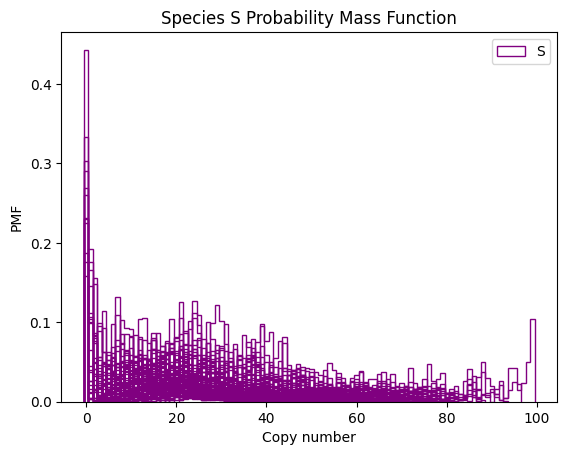

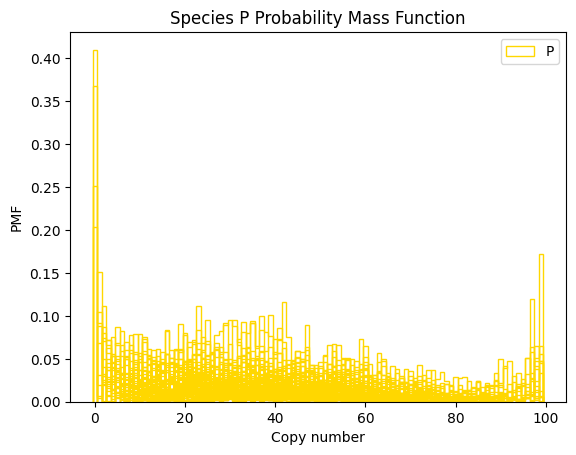

In [50]:
smod.PlotSpeciesDistributions(species2plot="R", linestyle= 'solid', colors="tab:red") # binsize
stochpy.plt.title('Species R Probability Mass Function')
smod.PlotSpeciesDistributions(species2plot="S", linestyle= 'solid', colors="purple") # binsize
stochpy.plt.title('Species S Probability Mass Function')
smod.PlotSpeciesDistributions(species2plot="P", linestyle= 'solid', colors="gold") # binsize
stochpy.plt.title('Species P Probability Mass Function')
smod.PrintSpeciesMeans()
smod.PrintSpeciesStandardDeviations()
# Calculating the mean and standard deviation of each species in a stochastic simulation is not as straightforward as it may sound.
# The time between two events is not constant, thus it is necessary to track the time spent in each state for each species.

Reaction	Mean
R1	0.003
R2	0.003
R3	0.005
Reaction	Mean
R1	0.003
R2	0.003
R3	0.003
Reaction	Mean
R1	0.004
R2	0.003
R3	0.004
Reaction	Mean
R1	0.003
R2	0.003
R3	0.003
Reaction	Mean
R1	0.004
R2	0.003
R3	0.004
Reaction	Mean
R1	0.003
R2	0.003
R3	0.003
Reaction	Mean
R1	0.004
R2	0.003
R3	0.003
Reaction	Mean
R1	0.004
R2	0.003
R3	0.005
Reaction	Mean
R1	0.003
R2	0.003
R3	0.004
Reaction	Mean
R1	0.004
R2	0.003
R3	0.004
Reaction	Mean
R1	0.003
R2	0.003
R3	0.003
Reaction	Mean
R1	0.003
R2	0.003
R3	0.004
Reaction	Mean
R1	0.003
R2	0.003
R3	0.003
Reaction	Mean
R1	0.003
R2	0.003
R3	0.003
Reaction	Mean
R1	0.003
R2	0.003
R3	0.003
Reaction	Mean
R1	0.003
R2	0.003
R3	0.003
Reaction	Mean
R1	0.004
R2	0.003
R3	0.003
Reaction	Mean
R1	0.003
R2	0.003
R3	0.003
Reaction	Mean
R1	0.003
R2	0.003
R3	0.003
Reaction	Mean
R1	0.003
R2	0.004
R3	0.003
Reaction	Mean
R1	0.004
R2	0.004
R3	0.004
Reaction	Mean
R1	0.003
R2	0.003
R3	0.003
Reaction	Mean
R1	0.003
R2	0.003
R3	0.003
Reaction	Mean
R1	0.003
R2	0.003
R3	0.003
Reaction	Mean
R1

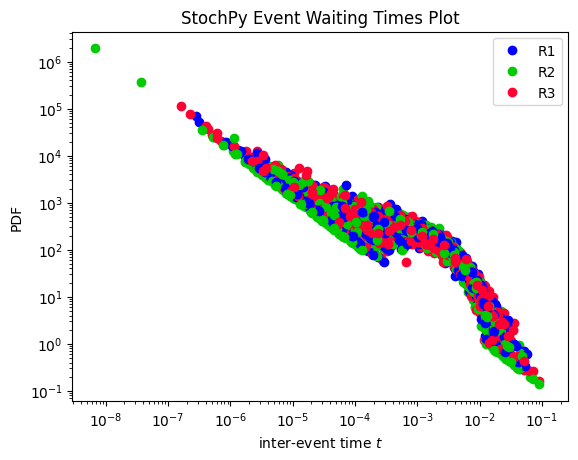

In [51]:
smod.PlotWaitingtimesDistributions(title='StochPy Event Waiting Times Plot')
smod.PrintWaitingtimesMeans()
# times between two subsequent firings of a particular reaction

In [52]:
smod.ChangeInitialSpeciesCopyNumber("R", 50)
smod.ChangeInitialSpeciesCopyNumber("S", 30)
smod.ChangeInitialSpeciesCopyNumber("P", 20)
smod.ChangeParameter("Pr", 0.2)
smod.ChangeParameter("Ps", 0.5)
smod.ChangeParameter("PP", 0.3)

Parameters are: ['Pr', 'Ps', 'Pp']


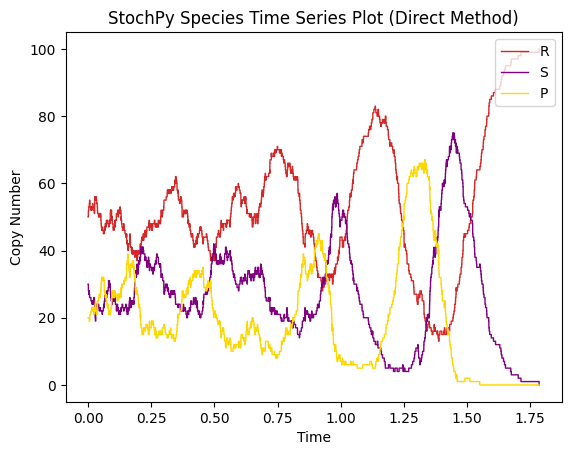

In [53]:
smod.DoStochSim(end=6000, quiet=False)
smod.PlotSpeciesTimeSeries(colors=["tab:red", "purple", "gold"])
stochpy.plt.title('StochPy Species Time Series Plot (Direct Method)');

In [ ]:
#smod.DoCompleteStochSim()
#smod.PlotSpeciesTimeSeries(colors=["tab:red", "purple", "gold"])
#stochpy.plt.title('StochPy Complete Species Time Series Plot (Direct Method)');

In [ ]:
#smod.GetRegularGrid(n_samples=51)
#smod.GetSpeciesAutocorrelations(n_samples=1001)
#smod.PlotSpeciesAutocorrelations(nlags=20)
#smod.GetPropensitiesAutocorrelations()
#smod.PlotPropensitiesAutocorrelations(nlags=20)
# The Gillespie algorithms generate data at irregular time points, but StochPy also offers an approach which returns data on a fixed regular time grid.
# A grid of which the user can specify the resolution (n_samples). The formation of such a regular grid allows for the analysis of autocorrelation
# (and autocovariance) of species and/or propensities within StochPy. Autocorrelation is the cross-correlation, a measure of similarity of a signal with itself.
# For different time separations (lags), this similarity can be determined which results a value between 1 and -1.
# Here, 1 corresponds to positive correlation and -1 to negative correlation. Typically, the first 50 lags are of interest. Here, we show the first 20 lags:

In [ ]:
smod.Export2File(analysis="timeseries",datatype="species", directory="/content/drive/My Drive/RSP_model/")